In [1]:
## Program developed for graphing and interpreting brain wave results

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaseEnsemble, RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier
from sklearn import svm, tree
import xgboost
import os
import csv
from sklearn.model_selection import train_test_split
#------------------
from scipy import fft, arange, signal

In [3]:
path_happy = "../../data/3-Happiness/"
path_anger = "../../data/0-Anger/"

In [4]:
def find_files(PATH):
    """
    Finds all the files in a particular directory. Return only .csv files.
    """
    files = []
    for r, d, f in os.walk(PATH):
        for file in f:
            if '.csv' in file:
                files.append(os.path.join(r, file).replace("\\","/"))
    return files

In [5]:
files_happy = find_files(path_happy)
files_anger = find_files(path_anger)

In [6]:
def remove_meta_data(PATH):
    """
    Return:
    1. Changes in Electric potential based on Unix timestamp from
        the 5 channels of the Emotiv headset. 2 channels from the Frontal Lobe, 
        1 channel from the parietal lobe, and 2 from temporal lobe.
    2. Pandas Dataframe of the data reflected from (1).
    """
    reader = csv.reader(open(PATH, "rt"), delimiter='\t')
    i = 0
    one_file_data = []
    for line in reader:
        if(i > 0):
            one_file_data.append(line)
        i += 1
    one_file_data = np.array(one_file_data)
    columns = one_file_data[0][0].split(",")[3:8]
    row_data = []
    for rows in one_file_data[1:]:
        row_data.append(rows[0].split(",")[3:8])
    dataframe = pd.DataFrame(row_data, columns=columns)
    return np.array(row_data), dataframe

In [7]:
def data_DF_dir(list_PATH):
    """
    Returns all the data from a given set of path files and its associated pandas dataframe object.
    """
    raw_data = []
    dataframes = []
    for file in list_PATH:
        rd, dfob = remove_meta_data(file)
        raw_data.append(rd)
        dataframes.append(dfob)
    return raw_data, dataframes

In [8]:
data_HAPPY, df_HAPPY = data_DF_dir(files_happy)

In [9]:
data_ANGER, df_ANGER = data_DF_dir(files_anger)

In [10]:
dxt1 = []
dxt2 = []
#---------------
txt1 = []
txt2 = []
#---------------
for x in data_HAPPY[0]:
    dxt1.append(float(x[0]))
    
for x in data_HAPPY[2]:
    dxt2.append(float(x[0]))
#-------------------
for x in data_ANGER[0]:
    txt1.append(float(x[0]))
    
for x in data_ANGER[2]:
    txt2.append(float(x[0]))

In [11]:
start = 100
end = 1000

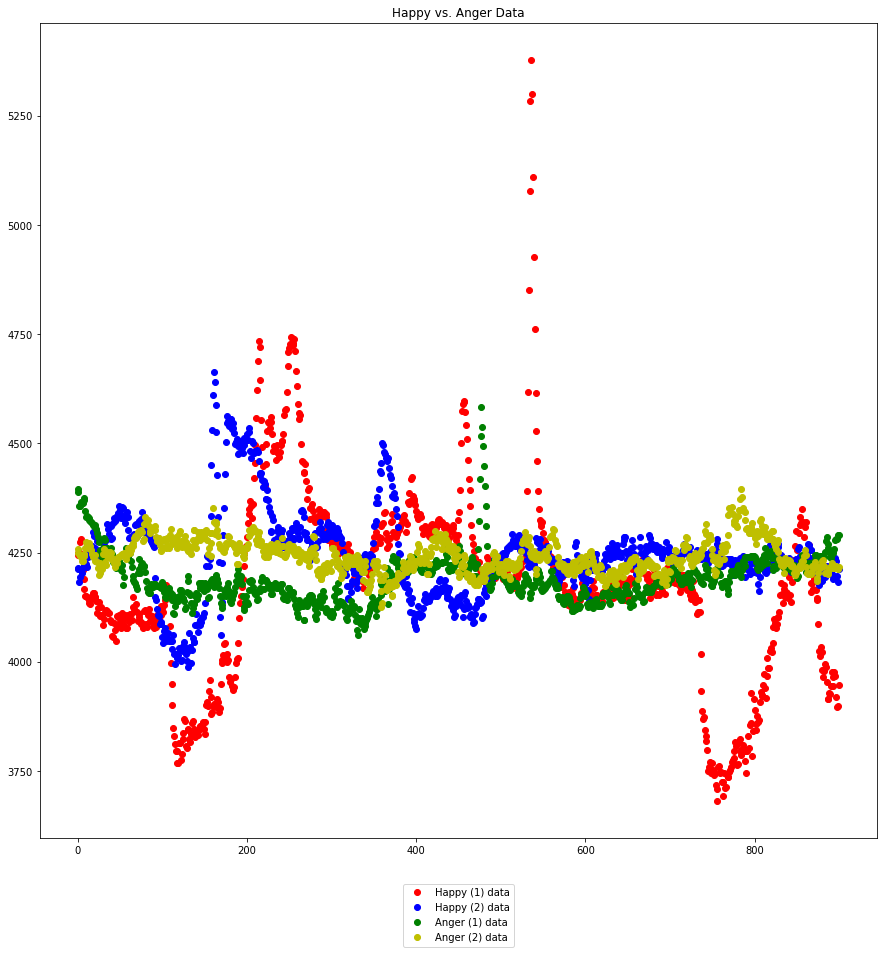

In [12]:
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111)
ax.plot(dxt1[start:end],'ro', label='Happy (1) data')
ax.plot(dxt2[start:end],'bo', label='Happy (2) data')
ax.plot(txt1[start:end],'go', label='Anger (1) data')
ax.plot(txt2[start:end],'yo',label='Anger (2) data')

plt.title('Happy vs. Anger Data')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.show()

In [13]:
### Data Split

In [14]:
anger_Y = np.full((1,3500),0)[0]
happy_Y = np.full((1,3500),1)[0]

In [15]:
def append_Y(data, value):
    new_value = []
    for x in data:
        ptr = []
        for flt in x:
            ptr.append(float(flt))
        ptr.append(value)
        new_value.append(ptr)
    return new_value

In [16]:
def combine_sets(data_list, classification_list, size):
    total_data = []
    for x, y in zip(data_list, classification_list):
        for g in x:
            dt = append_Y(g[:size], y[0])
            total_data += dt
    return total_data

In [17]:
full_data = combine_sets([data_HAPPY, data_ANGER], [happy_Y[:len(data_HAPPY)], anger_Y[:len(data_ANGER)]], 3500)

In [19]:
len(full_data), full_data[0], full_data[-1]

(35000,
 [4327.179688, 4318.974121, 4187.179688, 4172.307617, 4269.230957, 1],
 [4307.692383, 4821.025879, 4197.436035, 4336.922852, 4354.871582, 0])

In [20]:
import random
random.shuffle(full_data)

In [21]:
def split_X_Y(dataset):
    X = []
    y = []
    for x in dataset:
        dt = x[:-1]
        y.append(x[-1])
        X.append(dt)
    return np.array(X),np.array(y)

In [22]:
X_data, y_data = split_X_Y(full_data)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True)

In [286]:
classifiers = []
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = AdaBoostClassifier()
classifiers.append(model5)
model6 = GradientBoostingClassifier()
classifiers.append(model6)
model7 = BaggingClassifier()
classifiers.append(model7)

In [285]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s\n"%(type(clf), acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s\n"%(type(clf), cm))

Accuracy of <class 'xgboost.sklearn.XGBClassifier'> is 0.772

Confusion Matrix of <class 'xgboost.sklearn.XGBClassifier'> is [[4435  834]
 [1560 3671]]



C:\Users\qasim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of <class 'sklearn.svm.classes.SVC'> is 0.5037142857142857

Confusion Matrix of <class 'sklearn.svm.classes.SVC'> is [[  59 5210]
 [   1 5230]]

Accuracy of <class 'sklearn.tree.tree.DecisionTreeClassifier'> is 0.8140952380952381

Confusion Matrix of <class 'sklearn.tree.tree.DecisionTreeClassifier'> is [[4256 1013]
 [ 939 4292]]



C:\Users\qasim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of <class 'sklearn.ensemble.forest.RandomForestClassifier'> is 0.8621904761904762

Confusion Matrix of <class 'sklearn.ensemble.forest.RandomForestClassifier'> is [[4712  557]
 [ 890 4341]]

Accuracy of <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> is 0.7091428571428572

Confusion Matrix of <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> is [[4120 1149]
 [1905 3326]]

Accuracy of <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> is 0.7828571428571428

Confusion Matrix of <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> is [[4430  839]
 [1441 3790]]

Accuracy of <class 'sklearn.ensemble.bagging.BaggingClassifier'> is 0.8662857142857143

Confusion Matrix of <class 'sklearn.ensemble.bagging.BaggingClassifier'> is [[4753  516]
 [ 888 4343]]



In [28]:
### According to this algorithm, random forest has the highest score

In [252]:
classifiers[-1].predict([full_data[0][:-1],full_data[1][:-1]])

array([0, 1])

In [30]:
full_data[0],full_data[1]

([4123.077148, 4340.0, 4126.666504, 4153.846191, 4123.077148, 0],
 [4247.692383, 4115.897461, 4269.743652, 3871.794922, 4270.769043, 1])

In [31]:
def format_data(data):
    dt = []
    for x in data:
        X = []
        for y in x:
            X.append(float(y))
        dt.append(X)
    return dt

In [99]:
data_refactored_happy = format_data(data_HAPPY[0])
data_refactored_anger = format_data(data_ANGER[2])

In [168]:
pathTest = "../../data/Test/"

In [169]:
test_folder = find_files(pathTest)

In [170]:
def init_data(PATH):
    data = []
    dataframes = []
    for x in PATH:
        df = pd.read_csv(x)
        df = df.iloc[:,3:8]
        dataframes.append(df)
        data.append(np.array(df))
    return np.array(data), dataframes

In [171]:
data_test, df_test = init_data(test_folder)

In [175]:
# data_test.shape
df_test[-1].head(3)

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4
0,4113.333496,4763.077148,4087.179443,4428.205078,4161.025879
1,4029.230713,4789.230957,4017.435791,4374.358887,4091.794922
2,4025.128174,4843.589844,4004.102539,4236.410156,4069.743652


In [279]:
results = list(classifiers[-1].predict(data_test[3][100:]))

In [280]:
results.count(1), results.count(0)

(1505, 2776)

In [232]:
test_folder

['../../data/Test/ang0_27.12.19_23.39.16.bp.csv',
 '../../data/Test/ang1_27.12.19_23.40.14.bp.csv',
 '../../data/Test/h1_27.12.19_21.54.17.bp.csv',
 '../../data/Test/test_h1_27.12.19_21.53.28.bp.csv']

In [301]:
full_data[0]

[4123.077148, 4340.0, 4126.666504, 4153.846191, 4123.077148, 0]

In [325]:
# RandomForestRegressor, AdaBoostRegressor, BaseEnsemble

In [330]:
rfr = RandomForestRegressor.fit(RandomForestRegressor(), X=X_train, y=y_train)

C:\Users\qasim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [367]:
res_rfr = rfr.predict(data_HAPPY[3])

In [368]:
list(res_rfr).count(0)+list(res_rfr).count(0.2)+list(res_rfr).count(0.3)+list(res_rfr).count(0.4)

261

In [369]:
list(res_rfr).count(0.6)+list(res_rfr).count(0.7)+list(res_rfr).count(0.8)+list(res_rfr).count(0.9)+list(res_rfr).count(1)

3596